In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyzipcode import ZipCodeDatabase

In [47]:
# Chamando o nosso dataframe:
path = r'data/kc_house_data.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    sep=',',
    decimal='.'
)


In [48]:
# Cidade:
zcdb = ZipCodeDatabase()
city = []

for zipcode in df['zipcode']:#98144
    try:
        zc = zcdb[zipcode]
        city.append(zc.city)

    except KeyError:
        if zipcode == 98077:
            city.append(str('Woodinville'))
        else:
            city.append(str('nan'))

df['city'] = city

In [49]:
# Preço do metro quadrado:
df['preco_metro_quadrado'] = df['price'] / df['sqft_lot']

In [50]:
df_city = df
df_city = df.groupby('city').agg({'preco_metro_quadrado': 'median'}).reset_index()

preco_metro_quadrado_por_cidade = []

for cidade in df['city']:
    pompc = df_city[
        (df_city['city'] == cidade)
    ]['preco_metro_quadrado'].iloc[0]

    preco_metro_quadrado_por_cidade.append(pompc)

df['preco_metro_quadrado_por_cidade'] = preco_metro_quadrado_por_cidade

display(df_city)

,city,preco_metro_quadrado
0,Auburn,29.769841
1,Bellevue,68.456134
2,Black Diamond,18.014394
3,Bothell,53.052053
4,Carnation,16.171586
5,Duvall,37.430714
6,Enumclaw,24.435101
7,Fall City,9.696427
8,Federal Way,30.625000
9,Issaquah,90.439276


In [51]:
cidades_mais_populosas = [
    'Seattle', 
    'Spokane',
    'Tacoma',
    'Vancouver',
    'Bellevue',
    'Kent',
    'Everett',
    'Renton',
    'Federal Way',
    'Spokane Valley',
]

In [52]:
# valor do metro 2
# ano de construção
# condição do imóvel
# tamanho do terreno
df_filtro = df[
    (df['condition'] == 5) &
    (df['yr_built'] >= 1985) &
    (df['bedrooms'] >= 2) &
    (df['bathrooms'] >= 2) &
    (df['preco_metro_quadrado'] < df['preco_metro_quadrado_por_cidade']) &
    (df['city'].isin(cidades_mais_populosas))
]

In [53]:
# Removendo imóvel de id 8856890330
os_melhores_imoveis = df_filtro.drop(df[df['id'] == 8856890330].index)

In [54]:
display(
    os_melhores_imoveis[
        [
            'id',
            'price',
            'yr_built',
            'condition',
            'sqft_lot',
            'zipcode',
            'city',
            'preco_metro_quadrado',
            'preco_metro_quadrado_por_cidade'
        ]
    ]
)

,id,price,yr_built,condition,sqft_lot,zipcode,city,preco_metro_quadrado,preco_metro_quadrado_por_cidade
7298,4022902715,525000.0,1993,5,10277,98155,Seattle,51.084947,92.081851
8791,5067400032,550000.0,1985,5,14400,98198,Seattle,38.194444,92.081851
14682,7278100515,1295000.0,1985,5,19449,98177,Seattle,66.584400,92.081851
15541,2826049260,482500.0,1990,5,7626,98125,Seattle,63.270391,92.081851
18196,4139660040,760000.0,1997,5,14000,98006,Bellevue,54.285714,68.456134


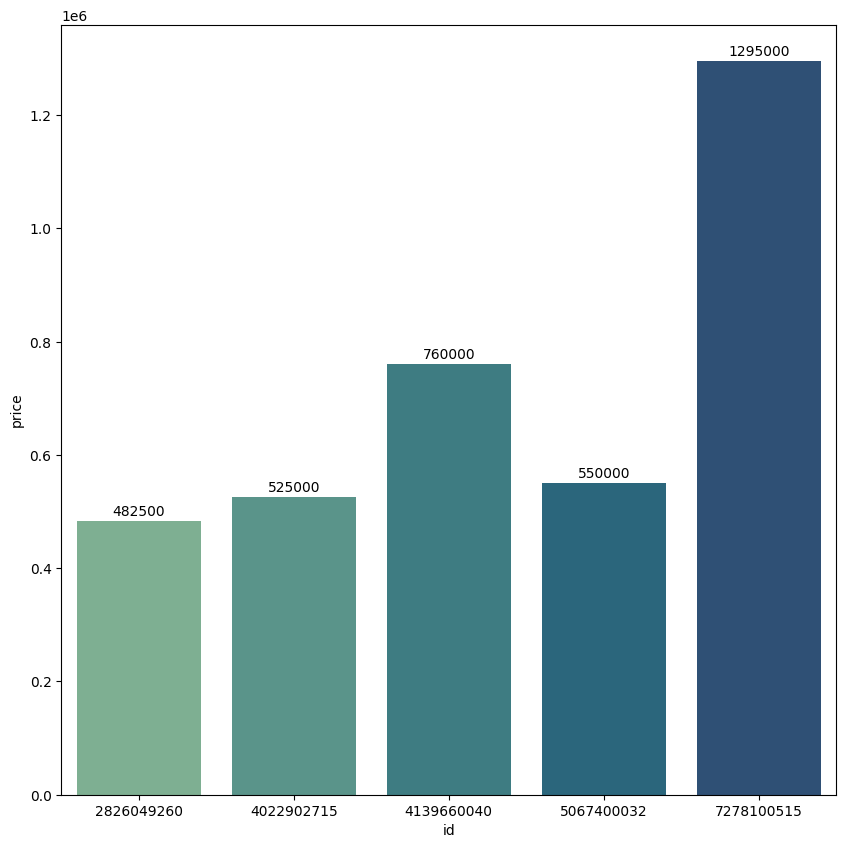

In [55]:
# Gráfico de barras:
fig, axes = plt.subplots(
    figsize=(10, 10),
)

ax = sns.barplot(
    data=os_melhores_imoveis, 
    x="id", 
    y="price",
    palette='crest'
)
ax.bar_label(
    ax.containers[0],
    fmt='%.0f',
    padding=2
)
    
plt.show()

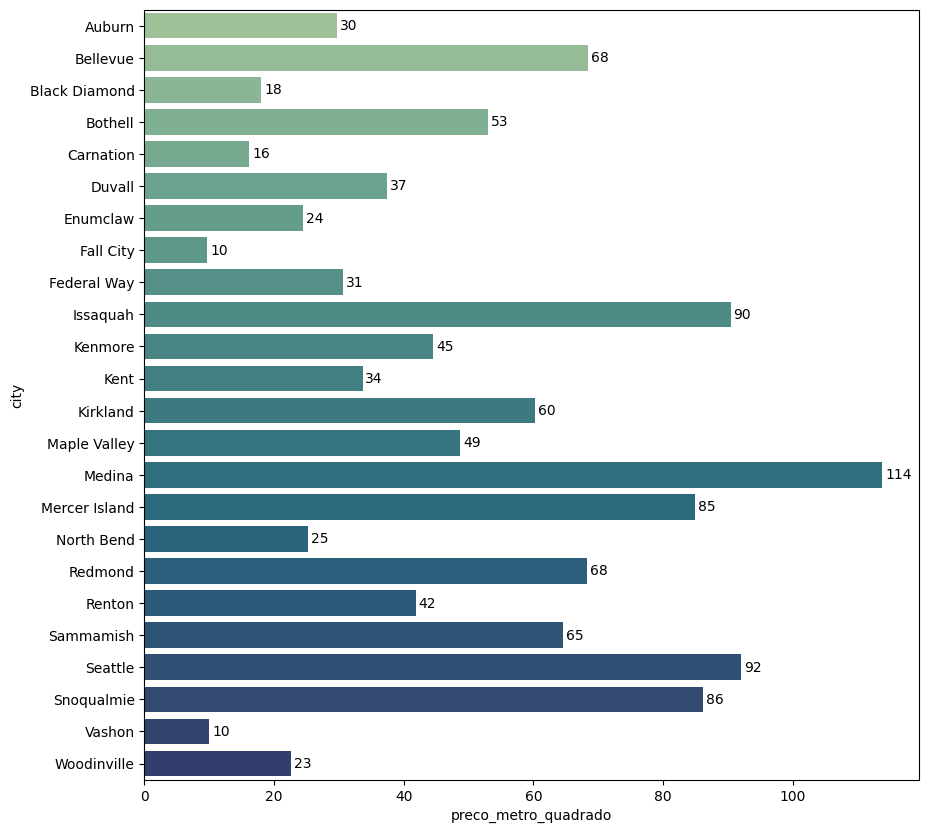

In [56]:
# Gráfico de barras:
fig, axes = plt.subplots(
    figsize=(10, 10),
)

ax = sns.barplot(
    data=df_city, 
    x="preco_metro_quadrado", 
    y="city",
    palette='crest'
)
ax.bar_label(
    ax.containers[0],
    fmt='%.0f',
    padding=2
)
    
plt.show()